In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

import torch

$$f(x) = x^2 + 4x + 4$$

In [2]:
# Define the function to minimize
def f(x):
    return x**2 - 4*x + 4

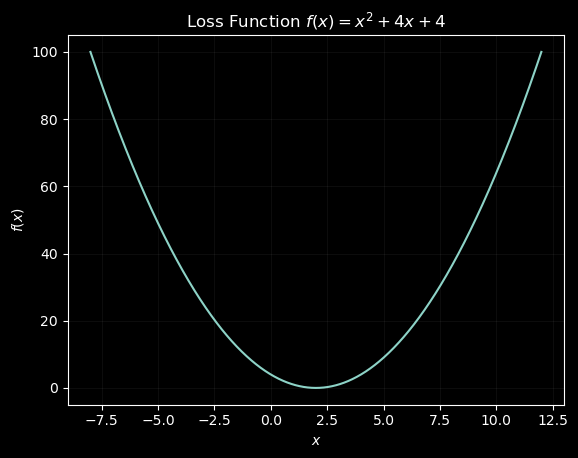

In [3]:
# Visualize the loss function
xs = torch.linspace(-8, 12, 1000)
ys = f(xs)

plt.plot(xs, ys)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Loss Function $f(x) = x^2 + 4x + 4$')
plt.grid(alpha=0.05)
plt.show()

In [4]:
# Randomly initialize the parameter (weight)
random_number = np.random.choice(xs)
x = torch.tensor(random_number, requires_grad=True)
x

tensor(-4.9570, requires_grad=True)

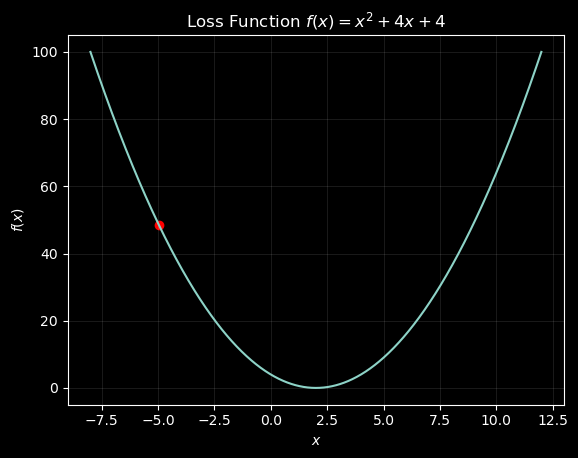

In [5]:
# Visualize the initialization of random number (weight) on the function landscape

plt.plot(xs, ys)
plt.scatter(random_number, f(random_number), color='red')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Loss Function $f(x) = x^2 + 4x + 4$')
plt.grid(alpha=0.1)
plt.show()

In [6]:
# Set Hyperparameters
lr = 0.1  # Learning rate
N = 100  # Number of iterations
losses = []  # Record of losses at each epoch

$$x_{t+1} = x_t - \alpha \nabla f(x_t)$$


$$\nabla f(x_t) = \Bigg [ \frac{\partial{f(x)}}{\partial{x_1}}, \frac{\partial{f(x)}}{\partial{x_2}},..., \frac{\partial{f(x)}}{\partial{x_n}}  \Bigg ]$$

In [7]:
# Gradient descent optimization loop
for epoch in range(N):
    # Evaluate the function and compute the gradient
    loss_function = f(x)
    loss_function.backward()

    # Update the parameter using gradient descent
    with torch.no_grad():
        x -= lr * x.grad

    # Reset the gradient to zero
    x.grad.zero_()

    # Track the loss for visualization
    losses.append(loss_function.item())


In [8]:
optim = x.item()
print("Optimal value of x:", optim)

Optimal value of x: 1.999999761581421


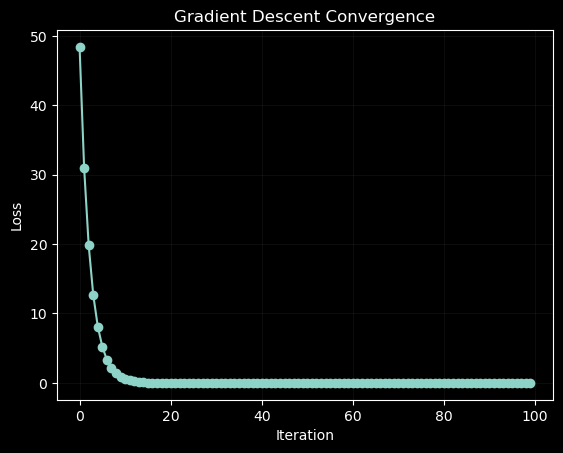

In [9]:
# Plot the convergence of the algorithm
plt.plot(range(N), losses, marker='o', linestyle='-')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Gradient Descent Convergence')
plt.grid(alpha=0.05)
plt.show()

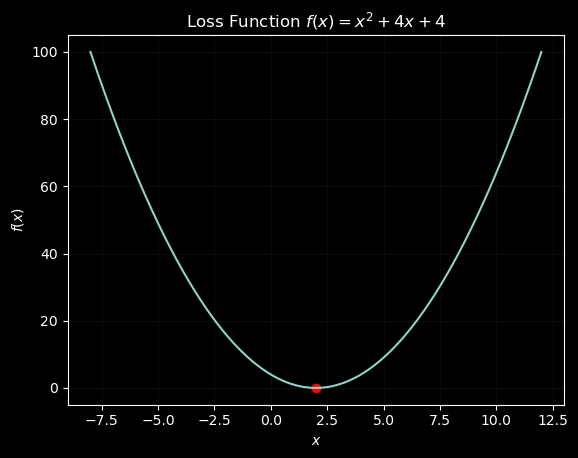

In [10]:
# Visualize the convergence of random number (weight) to the global minima

plt.plot(xs, ys)
plt.scatter(optim, f(optim), color='red')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Loss Function $f(x) = x^2 + 4x + 4$')
plt.grid(alpha=0.05)
plt.show()